In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import re

In [113]:
columns = [ 'Title' , 'Genre' , 'Description']
column = ['Title' , 'Description']

In [114]:
train_set= pd.read_csv(r'C:\Users\123ma\OneDrive\Desktop\CodeForge\Movie_Genre_Classification\Genre_Classification_Dataset\train_data.txt',delimiter=':::',engine='python', names=columns,index_col=0 )

In [115]:
test_set=pd.read_csv(r'C:\Users\123ma\OneDrive\Desktop\CodeForge\Movie_Genre_Classification\Genre_Classification_Dataset\test_data_solution.txt', delimiter=':::', engine='python',names=columns, index_col=0 )

In [116]:
train_set.loc[:,'Description'] = train_set['Description'].astype(str).str.lower()
test_set.loc[:,'Description'] = test_set['Description'].astype(str).str.lower()

train_set.drop(columns=['Title'], inplace=True)
test_set.drop(columns=['Title'], inplace=True)

In [117]:
train_set=train_set.drop_duplicates()
test_set=test_set.drop_duplicates()

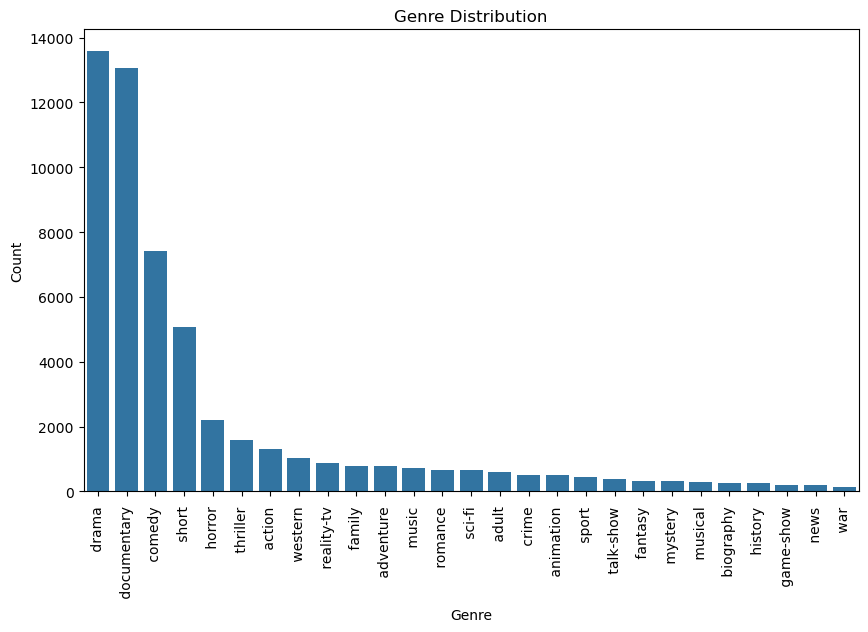

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=train_set , order=train_set['Genre'].value_counts().index )
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [119]:
x_train=train_set['Description']
y_train=train_set['Genre']
x_test=test_set['Description']
y_test=test_set['Genre']

In [120]:
def cleaning_data(text):
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub(r"\s+", " ", text).strip()
    return text
x_train=x_train.apply(cleaning_data)
x_test=x_test.apply(cleaning_data)

In [121]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [122]:
tfidf=TfidfVectorizer( stop_words ='english',max_features=5000)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [123]:
nb=MultinomialNB()
nb.fit(X_train, Y_train)

ValueError: could not convert string to float: 'from the moment an art director reads the script a series of parallel processes stem set follows the magical process from sketch to destruction in which all sorts of reference images feelings resources and events are bound to convey a new image a new physical and ephemeral reality where most of the actions we see on screen take place'

In [ ]:
y_pred=nb.predict(X_val)

In [ ]:
accuracy_train=accuracy_score(Y_val, y_pred)
print("Train accuracy:", accuracy_train)
print("Train classification report:")
print(classification_report(Y_val, y_pred,zero_division=0))

In [ ]:
y_pred_test=nb.predict(x_test)
accuracy_test=accuracy_score(y_test, y_pred_test)
print("\nTest accuracy:", accuracy_test)
print("Test classification report:")
print(classification_report(y_test, y_pred_test,zero_division=0))